In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load CSV ---
df = pd.read_csv(r"..\\RawData\\BNBUSDT.csv")

# --- Safely parse timestamps (handle mixed formats gracefully) ---
df['Open Time'] = pd.to_datetime(df['Open Time'], errors='coerce', utc=True)
df['Close Time'] = pd.to_datetime(df['Close Time'], errors='coerce', utc=True)

# --- Drop rows with unparsed times if necessary ---
df.dropna(subset=['Open Time', 'Close Time'], inplace=True)

# --- Rename columns to lowercase for compatibility with strategy code ---
df.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

# --- Sort and reset index ---
df = df.sort_values('Open Time').reset_index(drop=True)

# --- Set datetime index ---
df.set_index('Open Time', inplace=True)

df


,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ticker
Open Time,,,,,,,,,,,
2019-12-01 00:00:00+00:00,15.7030,15.7139,15.6500,15.6747,6413.480,2019-12-01 00:04:59.999000+00:00,1.004906e+05,123,4484.230,70261.636824,BNBUSDT
2019-12-01 00:05:00+00:00,15.6663,15.6846,15.6306,15.6408,2992.330,2019-12-01 00:09:59.999000+00:00,4.686540e+04,108,1763.080,27622.963409,BNBUSDT
2019-12-01 00:10:00+00:00,15.6380,15.6425,15.5609,15.6065,5107.040,2019-12-01 00:14:59.999000+00:00,7.968463e+04,235,4105.210,64059.404933,BNBUSDT
2019-12-01 00:15:00+00:00,15.6206,15.6365,15.5716,15.5783,5953.330,2019-12-01 00:19:59.999000+00:00,9.289066e+04,143,3174.710,49548.221529,BNBUSDT
2019-12-01 00:20:00+00:00,15.5787,15.6118,15.5600,15.6063,4567.410,2019-12-01 00:24:59.999000+00:00,7.117059e+04,126,3539.790,55160.189326,BNBUSDT
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09 23:40:00+00:00,665.7600,666.5500,663.8000,665.6700,2967.312,2025-05-09 23:44:59.999000+00:00,1.973695e+06,7276,1398.144,930104.770310,BNBUSDT
2025-05-09 23:45:00+00:00,665.6800,667.4700,665.3400,666.5100,2004.280,2025-05-09 23:49:59.999000+00:00,1.336400e+06,4787,722.962,482050.344920,BNBUSDT
2025-05-09 23:50:00+00:00,666.5100,666.8400,665.5700,666.6700,1683.240,2025-05-09 23:54:59.999000+00:00,1.121569e+06,5266,827.690,551500.049410,BNBUSDT


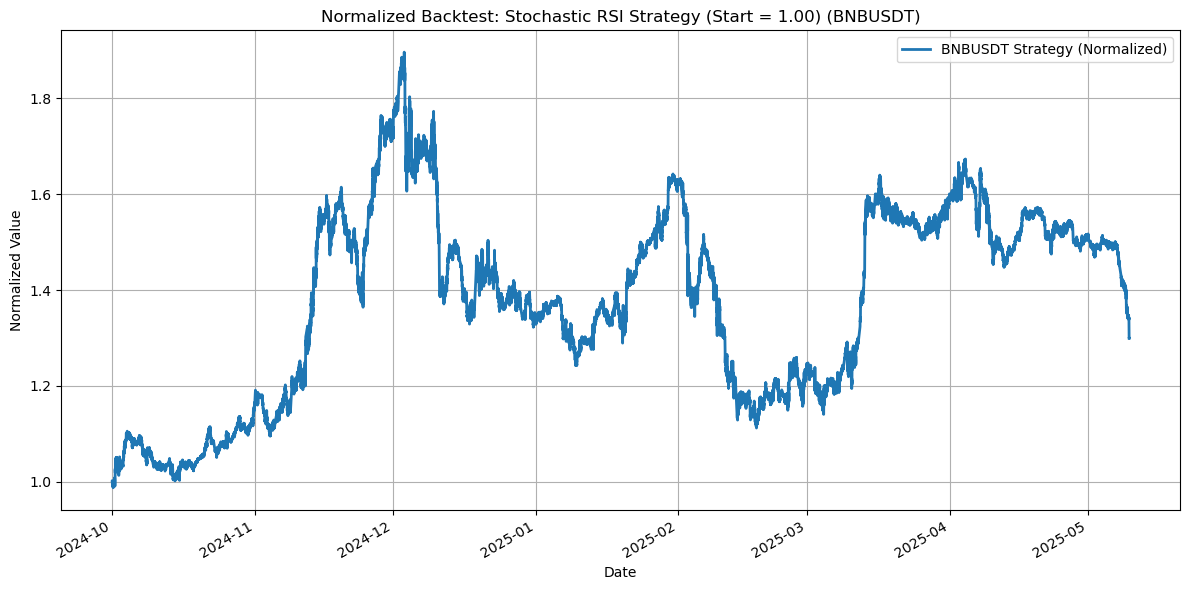


Strategy Performance Summary (BNBUSDT):

| Metric            |   Metric Value (BNBUSDT) |
|:------------------|-------------------------:|
| Sharpe Ratio      |                   1.0793 |
| Max Drawdown (%)  |                 -41.35   |
| Signal Count (1)  |               11939      |
| Signal Count (-1) |               18153      |
| Signal Count (0)  |               27221      |


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- RSI using Wilder's EMA ---
def compute_rsi_wilder(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# --- Stochastic RSI with EMA smoothing ---
def compute_stoch_rsi_ema(price_series, rsi_period=14, stoch_period=14, k_smooth=3, d_smooth=3):
    rsi = compute_rsi_wilder(price_series, rsi_period)
    min_rsi = rsi.rolling(window=stoch_period).min()
    max_rsi = rsi.rolling(window=stoch_period).max()
    stoch_rsi = (rsi - min_rsi) / (max_rsi - min_rsi)
    k = stoch_rsi.ewm(span=k_smooth, adjust=False).mean() * 100
    d = k.ewm(span=d_smooth, adjust=False).mean()
    return rsi, stoch_rsi, k, d

# --- Apply indicator calculations ---
df['RSI'], df['StochRSI'], df['%K'], df['%D'] = compute_stoch_rsi_ema(df['close'])

# --- Signal Generation ---
df['Signal'] = 0

bullish_crossover = (df['%K'].shift(1) < df['%D'].shift(1)) & (df['%K'] > df['%D'])
bearish_crossover = (df['%K'].shift(1) > df['%D'].shift(1)) & (df['%K'] < df['%D'])

oversold_k = df['%K'] < 10
overbought_k = df['%K'] > 80

rsi_buy_condition = df['RSI'] < 10
rsi_sell_condition = df['RSI'] >= 90

# --- Combine using OR logic
buy_signal = bullish_crossover | oversold_k | rsi_buy_condition
sell_signal = bearish_crossover | overbought_k | rsi_sell_condition

df.loc[buy_signal, 'Signal'] = 1
df.loc[sell_signal, 'Signal'] = -1
df.loc[buy_signal & sell_signal, 'Signal'] = 0  # neutral if both fire


# --- Backtest Function (Option A logic) ---
def run_backtest(df, label='Full Dataset', bars_per_day=288):
    df_bt = df[['close', 'Signal']].dropna().copy()
    df_bt = df_bt[df_bt.index >= '2024-10-01']
    # Step 1: Create position column from signal
    df_bt['Position'] = 0
    df_bt.loc[df_bt['Signal'] == 1, 'Position'] = 1
    df_bt.loc[df_bt['Signal'] == -1, 'Position'] = -1
    df_bt['Position'] = df_bt['Position'].replace(to_replace=0, method='ffill')

    # Step 2: Calculate returns
    df_bt['Returns'] = df_bt['close'].pct_change()
    df_bt['Strategy_Returns'] = df_bt['Returns'] * df_bt['Position'].shift(1)
    df_bt['Normalized_Strategy'] = (1 + df_bt['Strategy_Returns'].fillna(0)).cumprod()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_bt.index, df_bt['Normalized_Strategy'], label=f'{label} Strategy (Normalized)', linewidth=2)
    plt.title(f"Normalized Backtest: Stochastic RSI Strategy (Start = 1.00) ({label})")
    plt.xlabel("Date")
    plt.ylabel("Normalized Value")
    plt.legend()
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    # Metrics
    df_bt['Cumulative_Strategy'] = (1 + df_bt['Strategy_Returns'].fillna(0)).cumprod()
    excess_returns = df_bt['Strategy_Returns'].fillna(0)
    sharpe_ratio = np.sqrt(bars_per_day * 365) * excess_returns.mean() / excess_returns.std()
    df_bt['Peak'] = df_bt['Cumulative_Strategy'].cummax()
    df_bt['Drawdown'] = (df_bt['Cumulative_Strategy'] - df_bt['Peak']) / df_bt['Peak']
    max_drawdown = df_bt['Drawdown'].min()
    signal_counts = df_bt['Signal'].value_counts().to_dict()

    # Summary
    performance_summary = {
        'Sharpe Ratio': round(sharpe_ratio, 4),
        'Max Drawdown (%)': round(max_drawdown * 100, 2),
        'Signal Count (1)': signal_counts.get(1, 0),
        'Signal Count (-1)': signal_counts.get(-1, 0),
        'Signal Count (0)': signal_counts.get(0, 0)
    }
    summary_df = pd.DataFrame.from_dict(performance_summary, orient='index', columns=[f'Metric Value ({label})'])
    summary_df.index.name = 'Metric'
    print(f"\nStrategy Performance Summary ({label}):\n")
    print(summary_df.to_markdown())
    return df_bt

# --- Run Backtest ---
df_bt = run_backtest(df, label="BNBUSDT", bars_per_day=288)  # adjust bars_per_day based on your timeframe


In [26]:
def classify_signal_source(row):
    if row['Signal'] == 1 and row['RSI'] < 10 and row['%K'] < 10 and row['%K'] > row['%D']:
        return 'RSI+K Crossover Buy'
    elif row['Signal'] == -1 and row['RSI'] >= 90 and row['%K'] > 80 and row['%K'] < row['%D']:
        return 'RSI+K Crossover Sell'
    elif row['Signal'] == 1 and row['RSI'] < 10 and row['%K'] < 10:
        return 'RSI+K Oversold'
    elif row['Signal'] == -1 and row['RSI'] >= 90 and row['%K'] > 80:
        return 'RSI+K Overbought'
    elif row['Signal'] == 1 and row['RSI'] < 10:
        return 'RSI Buy Only'
    elif row['Signal'] == -1 and row['RSI'] >= 90:
        return 'RSI Sell Only'
    elif row['Signal'] != 0:
        return 'Other Cross'
    else:
        return 'None'

df['Signal_Source'] = df.apply(classify_signal_source, axis=1)

# --- Show last 60 rows of signal analysis ---
print("\nLast 60 rows of signal + indicator activity:\n")
display_cols = ['close', '%K', '%D', 'RSI', 'Signal', 'Signal_Source']
print(df[display_cols].tail(60).to_string())



Last 60 rows of signal + indicator activity:

                            close         %K         %D        RSI  Signal         Signal_Source
Open Time                                                                                       
2025-05-09 19:05:00+00:00  636.51  76.534889  58.475478  57.086130       0                  None
2025-05-09 19:10:00+00:00  635.80  38.267444  48.371461  51.058249      -1           Other Cross
2025-05-09 19:15:00+00:00  635.86  22.997774  35.684618  51.524090       0                  None
2025-05-09 19:20:00+00:00  635.60  11.498887  23.591752  49.332796       0                  None
2025-05-09 19:25:00+00:00  635.86  20.059271  21.825512  51.551773       0                  None
2025-05-09 19:30:00+00:00  635.60  10.029635  15.927573  49.229895       0                  None
2025-05-09 19:35:00+00:00  635.58   5.014818  10.471196  49.046896       1           Other Cross
2025-05-09 19:40:00+00:00  635.59   3.140450   6.805823  49.148679       1      

In [20]:
# --- RSI using Wilder's EMA ---
def compute_rsi_wilder(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# --- Define RSI threshold combinations to test ---
rsi_buy_levels = [5, 7.5, 10, 12.5, 15, 17.5, 20]
rsi_sell_levels = [95, 92.5, 90, 87.5, 85, 82.5, 80]
threshold_pairs = [(buy, sell) for buy in rsi_buy_levels for sell in rsi_sell_levels]

# --- Precompute RSI ---
df['RSI'] = compute_rsi_wilder(df['close'], period=14)

# --- Store backtest results ---
results = []

# --- Grid search over RSI threshold pairs ---
for rsi_buy, rsi_sell in threshold_pairs:
    temp = df.copy()
    temp['Signal'] = 0

    temp.loc[temp['RSI'] < rsi_buy, 'Signal'] = 1
    temp.loc[temp['RSI'] > rsi_sell, 'Signal'] = -1

    # Optional: prioritize buy if both fire (in practice should be mutually exclusive)
    temp.loc[(temp['RSI'] < rsi_buy) & (temp['RSI'] > rsi_sell), 'Signal'] = 1

    # --- Backtest (last 60 bars only) ---
    bt = temp[['close', 'Signal']].dropna().iloc[-60:].copy()
    bt['Position'] = bt['Signal'].replace(to_replace=0, method='ffill')
    bt['Returns'] = bt['close'].pct_change()
    bt['Strategy_Returns'] = bt['Returns'] * bt['Position'].shift(1)
    bt['Cumulative_Strategy'] = (1 + bt['Strategy_Returns'].fillna(0)).cumprod()

    final_value = bt['Cumulative_Strategy'].iloc[-1]

    results.append({
        'RSI_Buy': rsi_buy,
        'RSI_Sell': rsi_sell,
        'Final_Value': final_value
    })

# --- Output results ---
results_df = pd.DataFrame(results).sort_values(by='Final_Value', ascending=False)
print("RSI Strategy Grid Search (last 60 bars):")
print(results_df.to_string(index=False))


C:\Users\User\AppData\Local\Temp\ipykernel_6160\520631826.py:36: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  bt['Position'] = bt['Signal'].replace(to_replace=0, method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_6160\520631826.py:36: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  bt['Position'] = bt['Signal'].replace(to_replace=0, method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_6160\520631826.py:36: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  bt['Position'] = bt['Signal'].replace(to_replace=0, method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_6160\520631826.py:36: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  bt['Position'] = bt['Signal'].replace(to_replace=0, method='ffill')
C:\Users\User\AppData\Lo

RSI Strategy Grid Search (last 60 bars):
 RSI_Buy  RSI_Sell  Final_Value
     5.0      95.0     1.000000
    10.0      95.0     1.000000
    15.0      95.0     1.000000
    12.5      95.0     1.000000
     7.5      95.0     1.000000
    17.5      95.0     1.000000
    20.0      95.0     1.000000
     5.0      92.5     0.993824
    12.5      90.0     0.993824
    12.5      92.5     0.993824
    17.5      92.5     0.993824
    17.5      90.0     0.993824
    10.0      90.0     0.993824
    15.0      90.0     0.993824
    10.0      92.5     0.993824
    20.0      92.5     0.993824
     7.5      90.0     0.993824
     7.5      92.5     0.993824
    20.0      90.0     0.993824
     5.0      90.0     0.993824
    15.0      92.5     0.993824
    17.5      85.0     0.980421
    17.5      82.5     0.980421
    17.5      87.5     0.980421
    20.0      87.5     0.980421
    20.0      85.0     0.980421
    20.0      82.5     0.980421
    15.0      82.5     0.980421
    15.0      85.0     0.980421

C:\Users\User\AppData\Local\Temp\ipykernel_6160\520631826.py:36: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  bt['Position'] = bt['Signal'].replace(to_replace=0, method='ffill')


C:\Users\User\AppData\Local\Temp\ipykernel_6160\4169926034.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  theta = -model.params[1]
C:\Users\User\AppData\Local\Temp\ipykernel_6160\4169926034.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = model.params[0] / theta


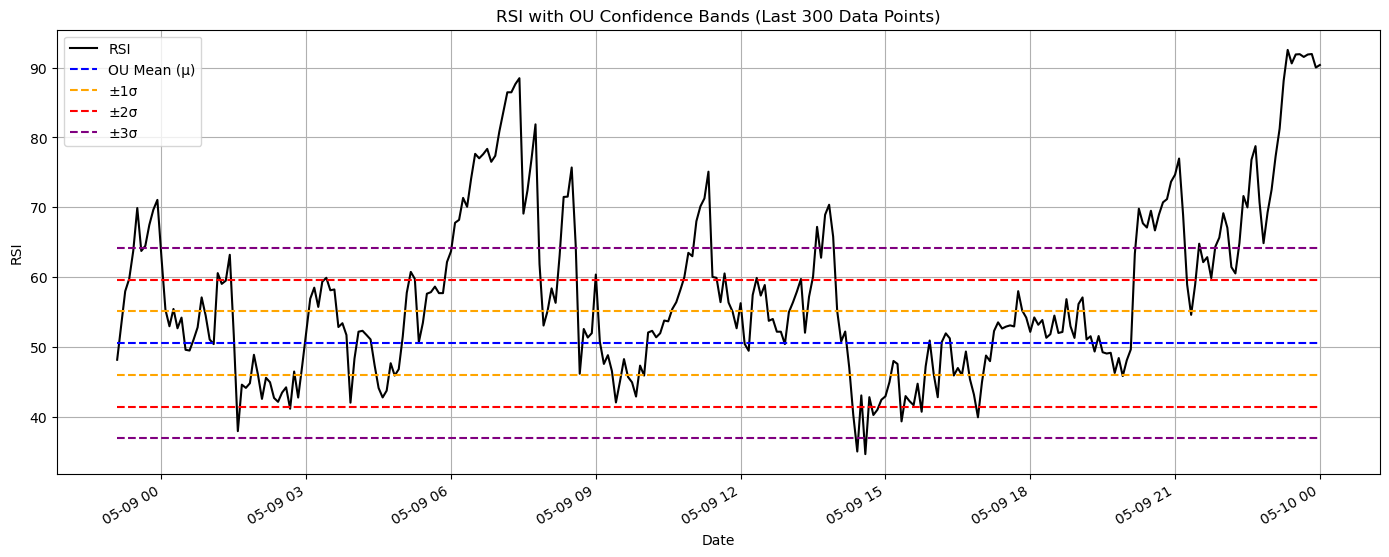


[OU Model on RSI]
Long-term mean (μ):     50.53
Reversion speed (θ):    0.0842
Residual volatility (σ): 4.5386


In [22]:
import statsmodels.api as sm

# --- Ensure RSI is already computed earlier ---
# If not, uncomment this line:
# df['RSI'] = compute_rsi_wilder(df['close'], period=14)

# --- OU Process Estimation on existing RSI ---
rsi = df['RSI'].dropna()
rsi_diff = rsi.diff().dropna()
rsi_lag = rsi.shift(1).dropna().loc[rsi_diff.index]  # align with diff index

# OU regression: ΔRSI_t = α + β * RSI_{t-1} + ε
model = sm.OLS(rsi_diff, sm.add_constant(rsi_lag)).fit()
theta = -model.params[1]
mu = model.params[0] / theta
sigma = np.std(model.resid)

# --- Create OU bands in the original df ---
df['RSI_OU'] = mu
df['RSI_+1σ'] = mu + sigma
df['RSI_-1σ'] = mu - sigma
df['RSI_+2σ'] = mu + 2 * sigma
df['RSI_-2σ'] = mu - 2 * sigma
df['RSI_+3σ'] = mu + 3 * sigma
df['RSI_-3σ'] = mu - 3 * sigma

# --- Plot: Last 300 RSI points with OU bands ---
df_rsi = df[['RSI', 'RSI_OU', 'RSI_+1σ', 'RSI_-1σ', 'RSI_+2σ', 'RSI_-2σ', 'RSI_+3σ', 'RSI_-3σ']].dropna().tail(300)

plt.figure(figsize=(14, 6))
plt.plot(df_rsi.index, df_rsi['RSI'], color='black', label='RSI')
plt.plot(df_rsi.index, df_rsi['RSI_OU'], linestyle='--', color='blue', label='OU Mean (μ)')
plt.plot(df_rsi.index, df_rsi['RSI_+1σ'], linestyle='--', color='orange', label='±1σ')
plt.plot(df_rsi.index, df_rsi['RSI_-1σ'], linestyle='--', color='orange')
plt.plot(df_rsi.index, df_rsi['RSI_+2σ'], linestyle='--', color='red', label='±2σ')
plt.plot(df_rsi.index, df_rsi['RSI_-2σ'], linestyle='--', color='red')
plt.plot(df_rsi.index, df_rsi['RSI_+3σ'], linestyle='--', color='purple', label='±3σ')
plt.plot(df_rsi.index, df_rsi['RSI_-3σ'], linestyle='--', color='purple')

plt.title("RSI with OU Confidence Bands (Last 300 Data Points)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

# --- Print OU Parameters ---
print(f"\n[OU Model on RSI]")
print(f"Long-term mean (μ):     {mu:.2f}")
print(f"Reversion speed (θ):    {theta:.4f}")
print(f"Residual volatility (σ): {sigma:.4f}")
